## Loading and Cleaning


In [64]:
import pandas as pd
import numpy as np

# This data is the famouse income dataset of adults which is available in the UCI machine learning repository. It shows if the given person has income more than 50k or not.
# https://www.kaggle.com/datasets/uciml/adult-census-income 

columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "sex", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

# Load dataset and assign column names
df = pd.read_csv("income.csv", header=None, names=columns, na_values="?", skipinitialspace=True)
df.drop(df.index[0], inplace=True)
numeric_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 1 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [67]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [68]:
# since only these 3 columns have missing values, we can fill them with the mode of the column
for col in ['workclass', 'occupation', 'native_country']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_144278/3354019144.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [69]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 24


In [70]:
df.drop_duplicates(inplace=True)

In [71]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_count = df.shape[0]
    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after_count = df_clean.shape[0]
    print(f"Removed {before_count - after_count} outliers from '{col}'.")
    return df_clean

# Remove outliers from 'age' and 'hours_per_week'
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'hours_per_week')

Removed 142 outliers from 'age'.
Removed 8913 outliers from 'hours_per_week'.


In [72]:
# Standardize Categorical Variables: Convert to lowercase and strip whitespace
categorical_cols = ["workclass", "education", "marital_status", "occupation", 
                    "relationship", "race", "sex", "native_country", "income"]

for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3,66,private,186061,some-college,10,widowed,prof-specialty,unmarried,black,female,0,4356,40,united-states,<=50k
4,54,private,140359,7th-8th,4,divorced,machine-op-inspct,unmarried,white,female,0,3900,40,united-states,<=50k
5,41,private,264663,some-college,10,separated,prof-specialty,own-child,white,female,0,3900,40,united-states,<=50k
6,34,private,216864,hs-grad,9,divorced,other-service,unmarried,white,female,0,3770,45,united-states,<=50k
7,38,private,150601,10th,6,separated,adm-clerical,unmarried,white,male,0,3770,40,united-states,<=50k


## Exploratory Data Analysis

### Univariate Analysis


In [73]:
print("\nSummary Statistics")
df.describe()


Summary Statistics


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,23482.000000,2.348200e+04,23482.000000,23482.000000,23482.000000,23482.000000
mean,38.743378,1.916818e+05,10.108466,992.220509,88.078400,41.567584
std,12.191322,1.054618e+05,2.537490,6720.347282,402.877049,4.014874
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,33.000000
25%,29.000000,1.195002e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.803030e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.387120e+05,13.000000,0.000000,0.000000,42.000000
max,78.000000,1.455435e+06,16.000000,99999.000000,4356.000000,52.000000


In [74]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n===== NUMERICAL SUMMARY =====")
print(df[numeric_cols].describe())

# Additional statistics: variance, skewness, median, and mode
print("\n===== VARIANCE OF NUMERICAL COLUMNS =====")
print(df[numeric_cols].var())

print("\n===== SKEWNESS OF NUMERICAL COLUMNS =====")
print(df[numeric_cols].skew())

print("\n===== MEDIAN OF NUMERICAL COLUMNS =====")
print(df[numeric_cols].median())

print("\n===== MODE OF NUMERICAL COLUMNS =====")
for col in numeric_cols:
    print(f"Mode of {col}: {df[col].mode()[0]}")


===== NUMERICAL SUMMARY =====
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  23482.000000  2.348200e+04   23482.000000  23482.000000  23482.000000   
mean      38.743378  1.916818e+05      10.108466    992.220509     88.078400   
std       12.191322  1.054618e+05       2.537490   6720.347282    402.877049   
min       17.000000  1.487800e+04       1.000000      0.000000      0.000000   
25%       29.000000  1.195002e+05       9.000000      0.000000      0.000000   
50%       38.000000  1.803030e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.387120e+05      13.000000      0.000000      0.000000   
max       78.000000  1.455435e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    23482.000000  
mean        41.567584  
std          4.014874  
min         33.000000  
25%         40.000000  
50%         40.000000  
75%         42.000000  
max         52.000000  

===== VARIANCE OF NUMERICAL COL


===== FREQUENCY DISTRIBUTIONS FOR CATEGORICAL VARIABLES =====

Value Counts for 'workclass':
workclass
private             17901
local-gov            1654
self-emp-not-inc     1425
state-gov             998
federal-gov           827
self-emp-inc          669
without-pay             4
never-worked            4
Name: count, dtype: int64

Value Counts for 'education':
education
hs-grad         7987
some-college    4952
bachelors       4040
masters         1261
assoc-voc       1087
assoc-acdm       781
11th             651
10th             609
7th-8th          443
9th              390
prof-school      345
12th             276
5th-6th          259
doctorate        257
1st-4th          112
preschool         32
Name: count, dtype: int64

Value Counts for 'marital_status':
marital_status
married-civ-spouse       11317
never-married             7030
divorced                  3481
separated                  779
widowed                    552
married-spouse-absent      309
married-af-spouse     

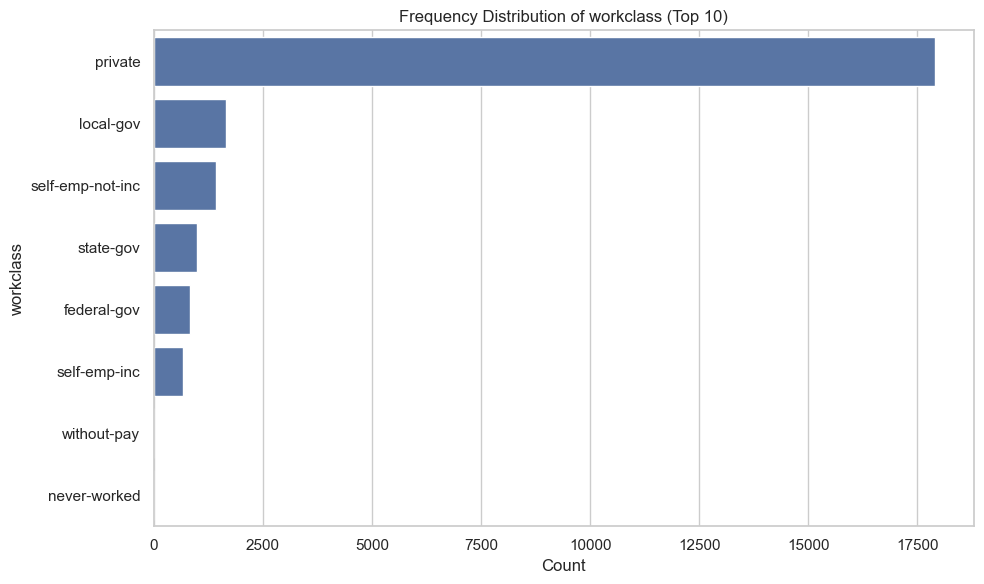

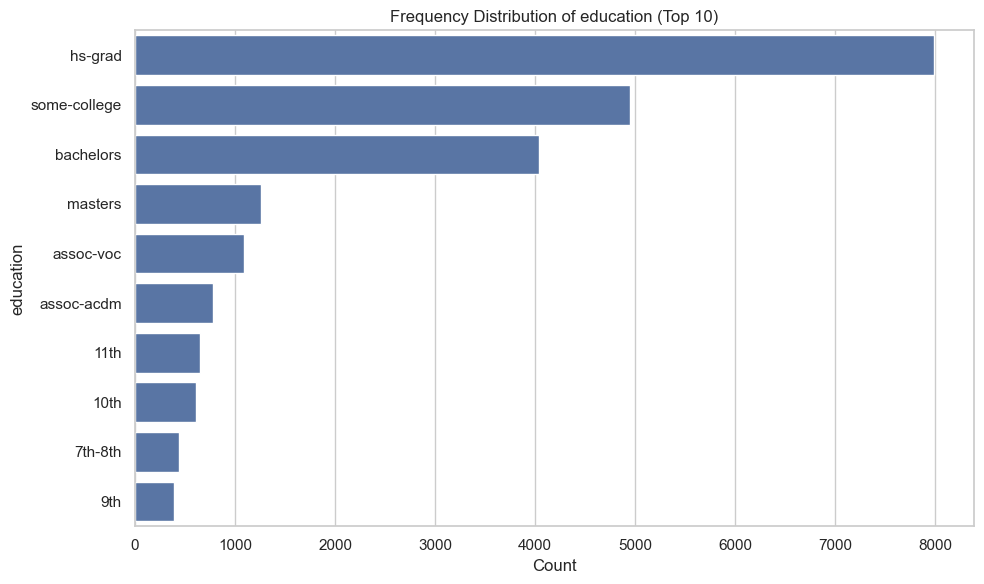

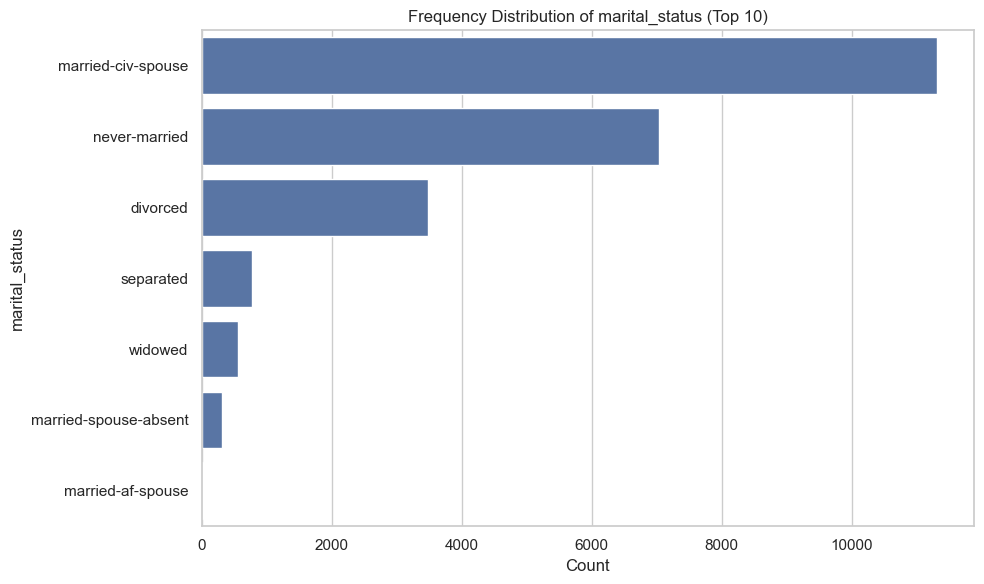

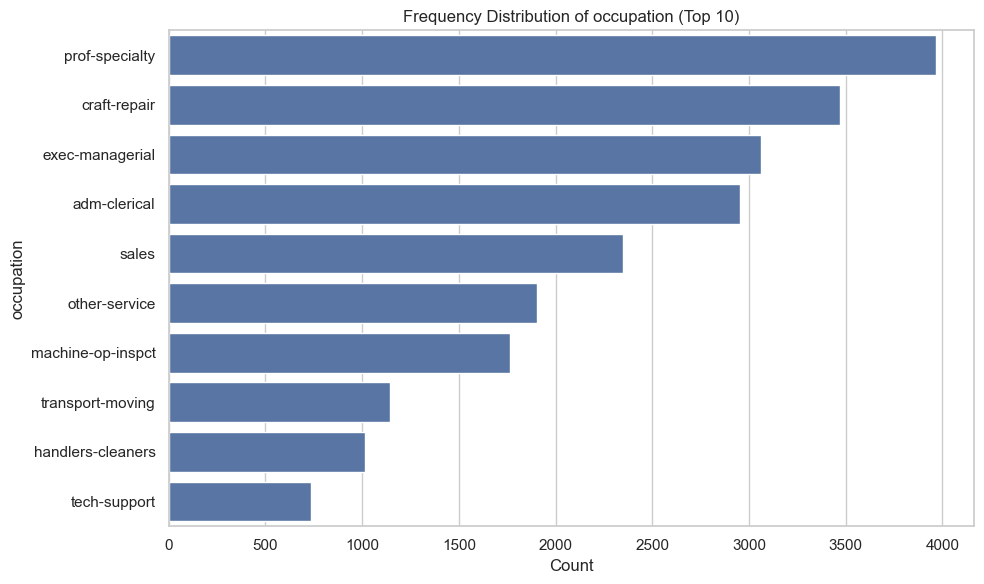

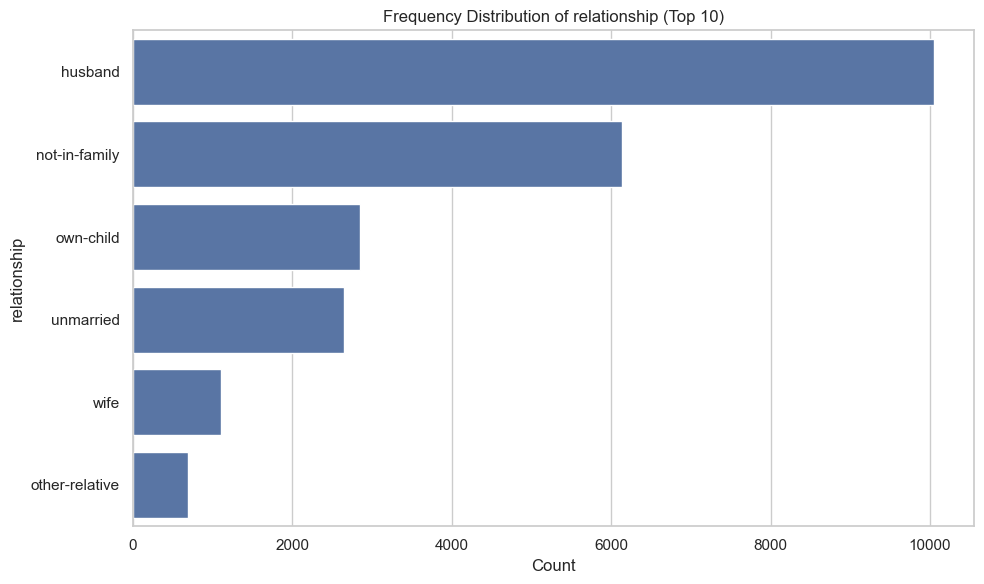

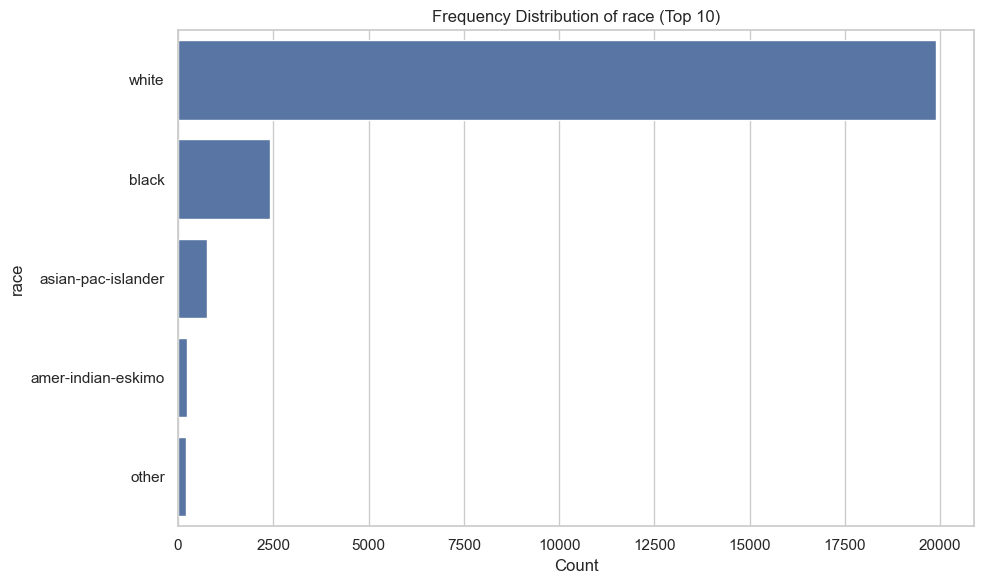

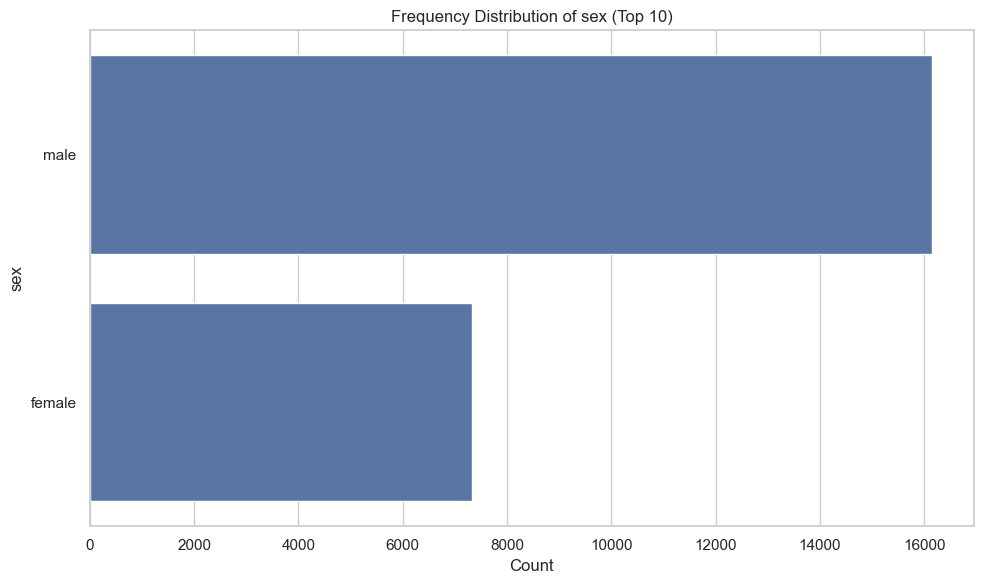

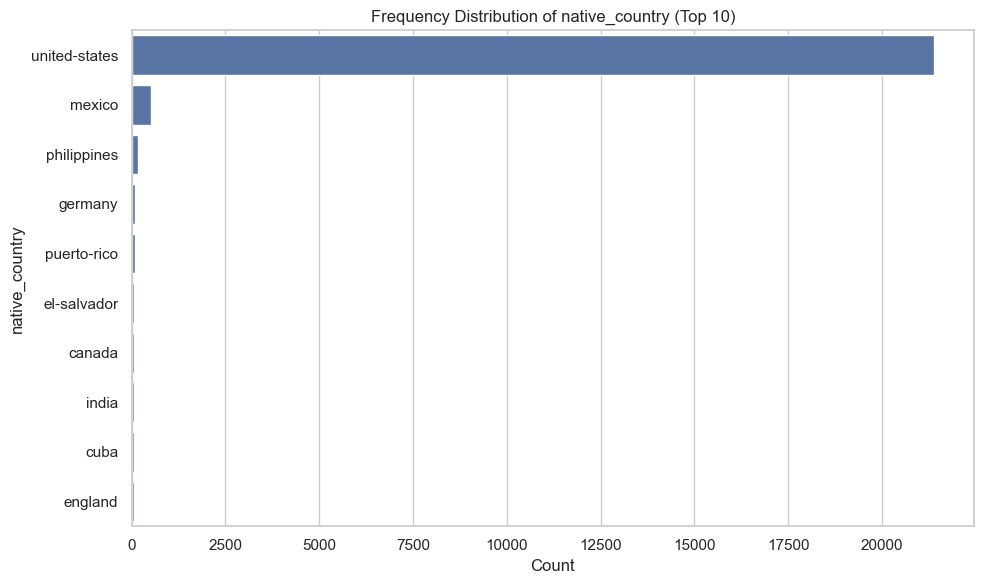

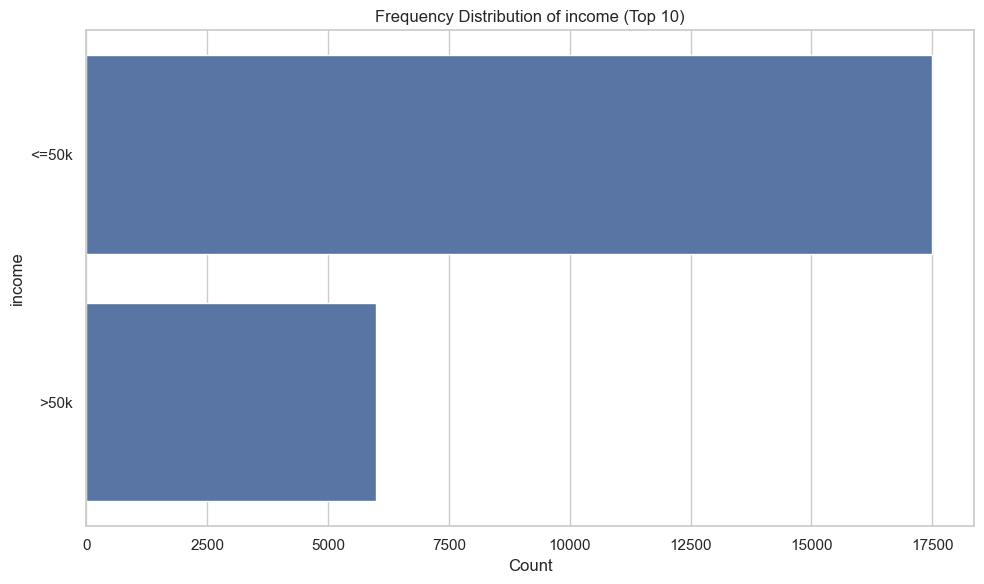

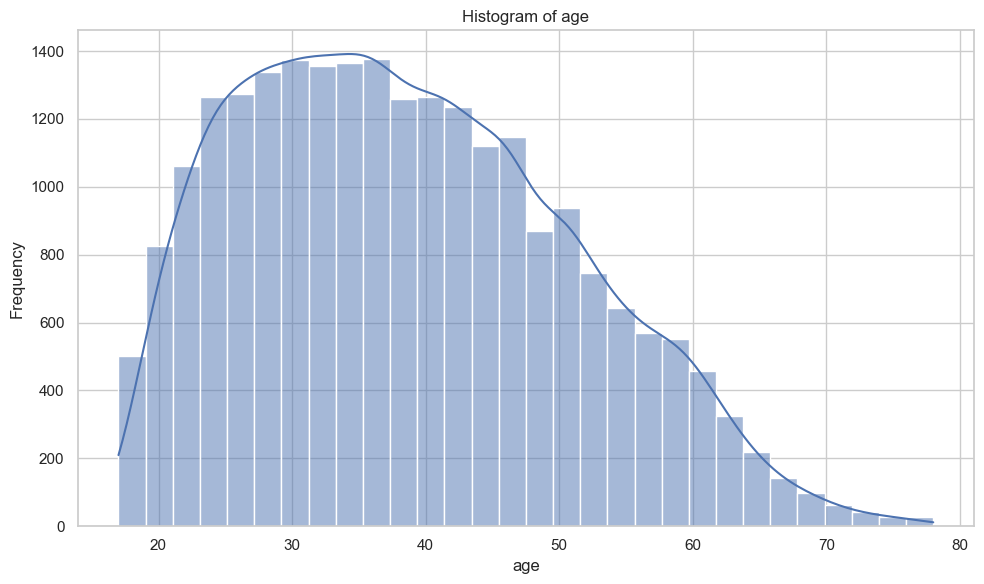

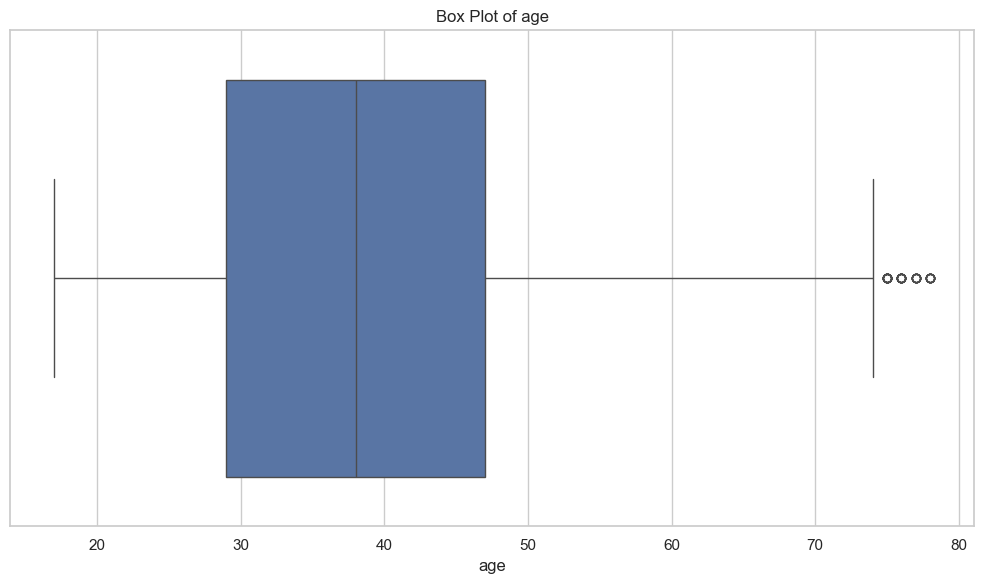

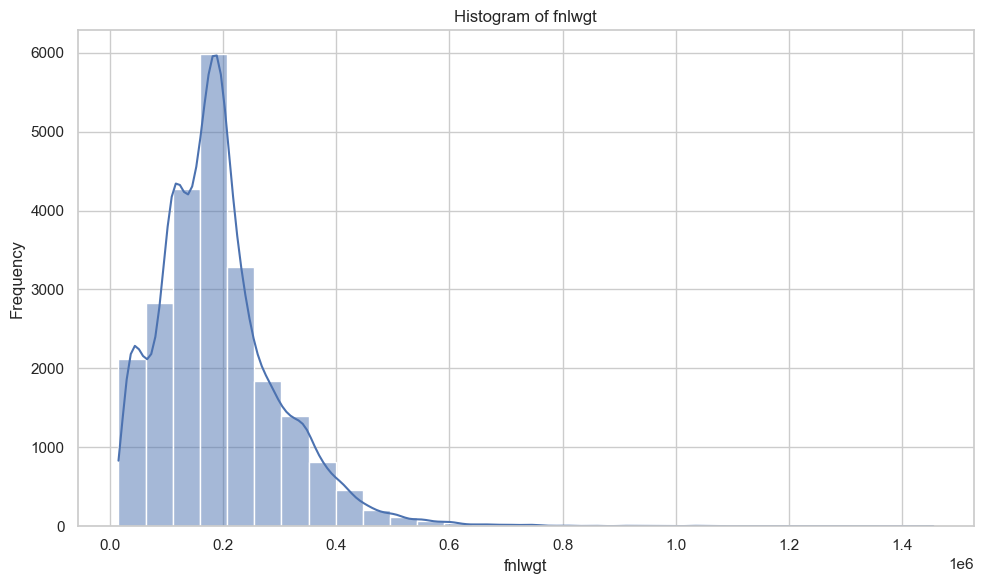

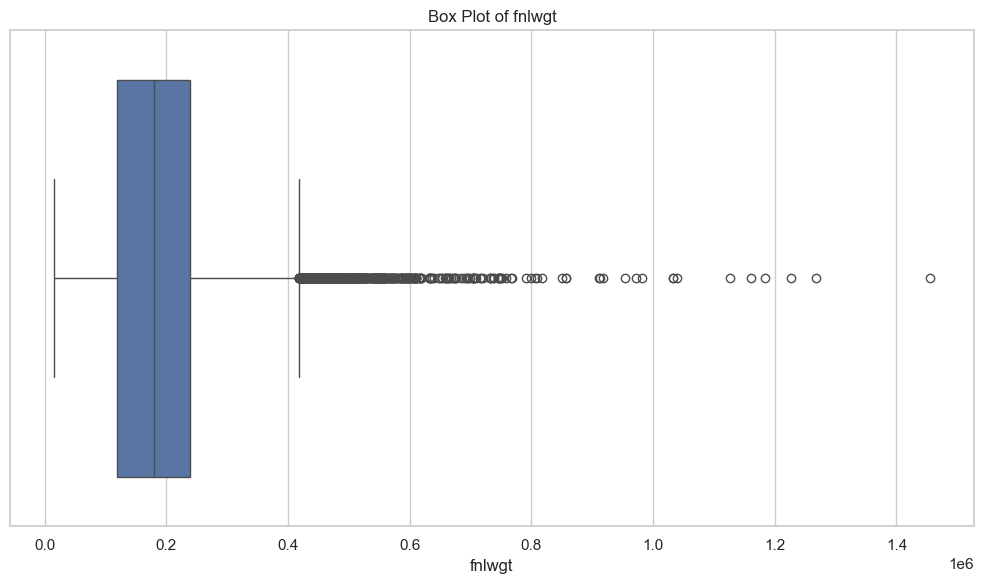

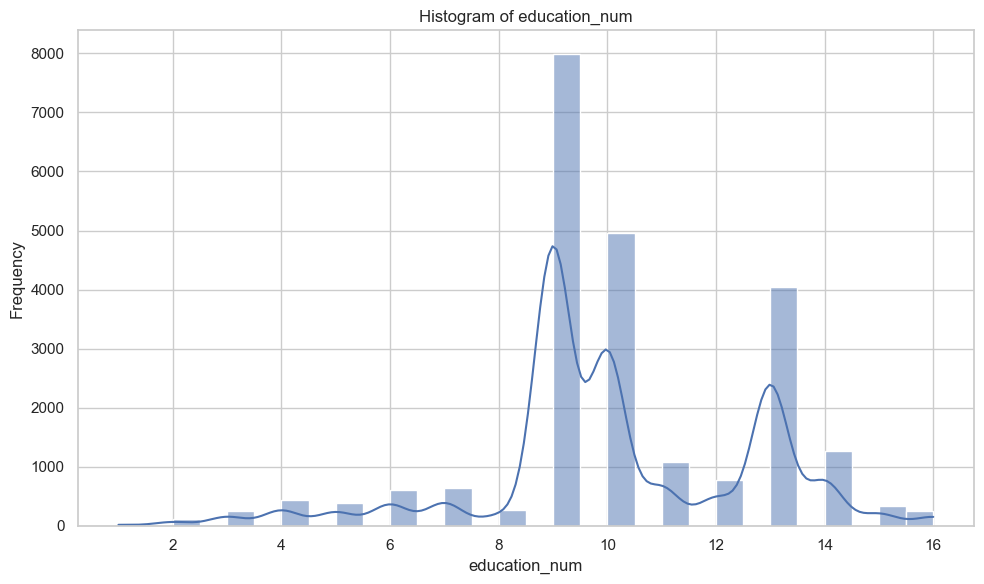

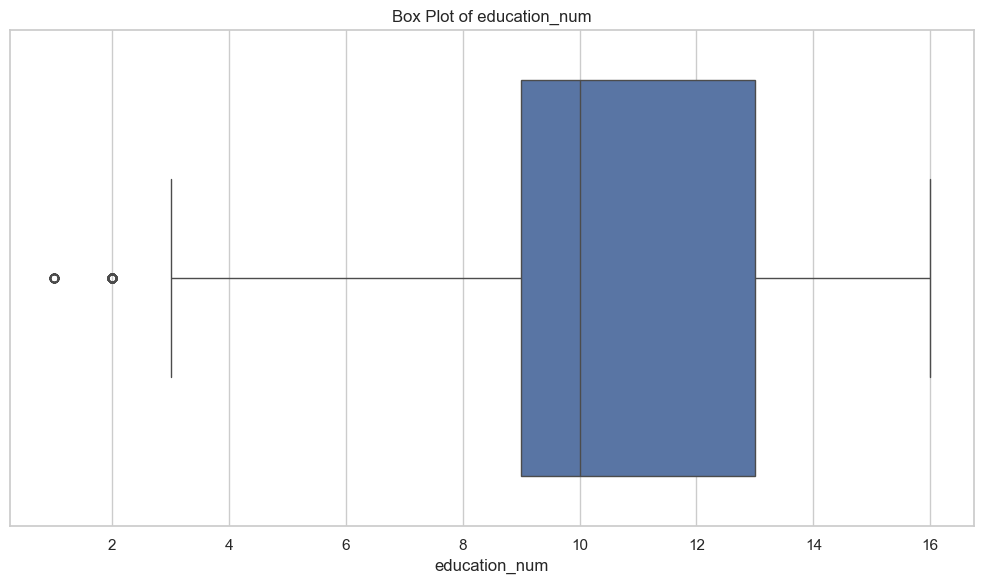

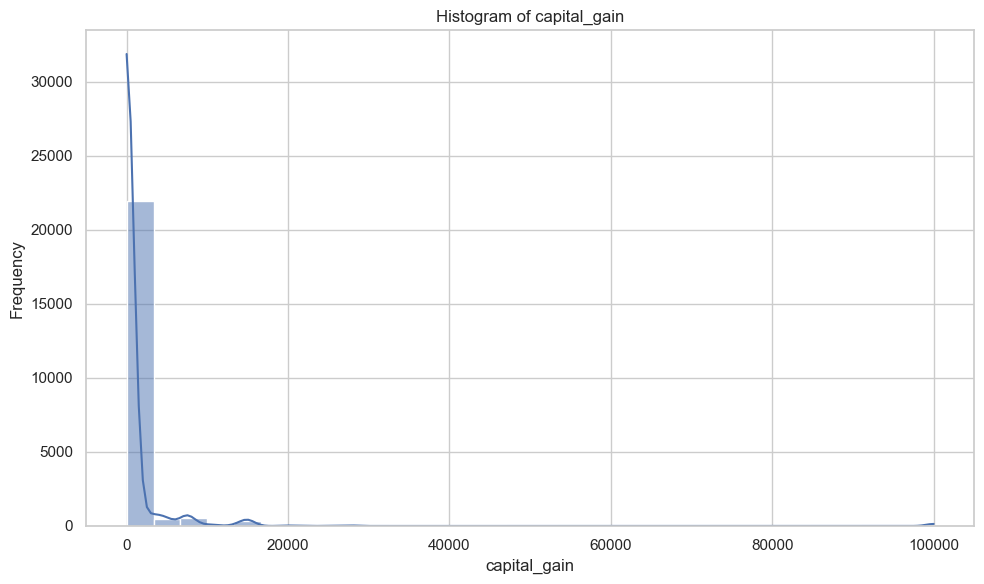

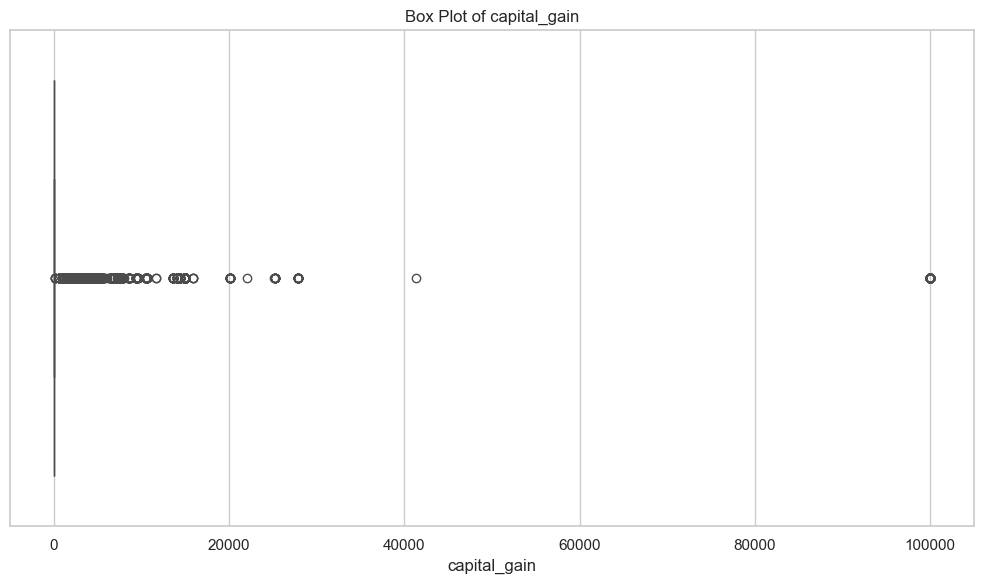

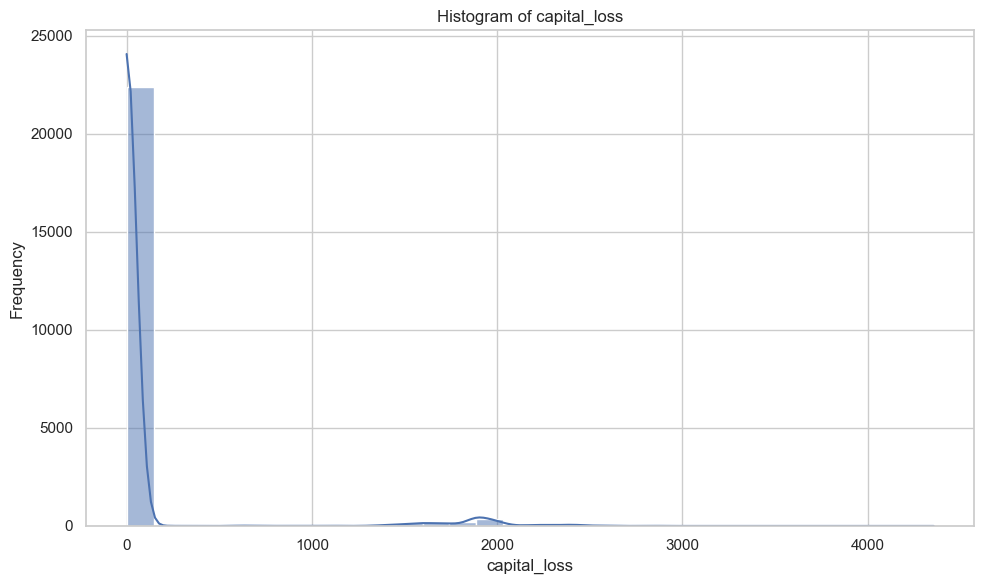

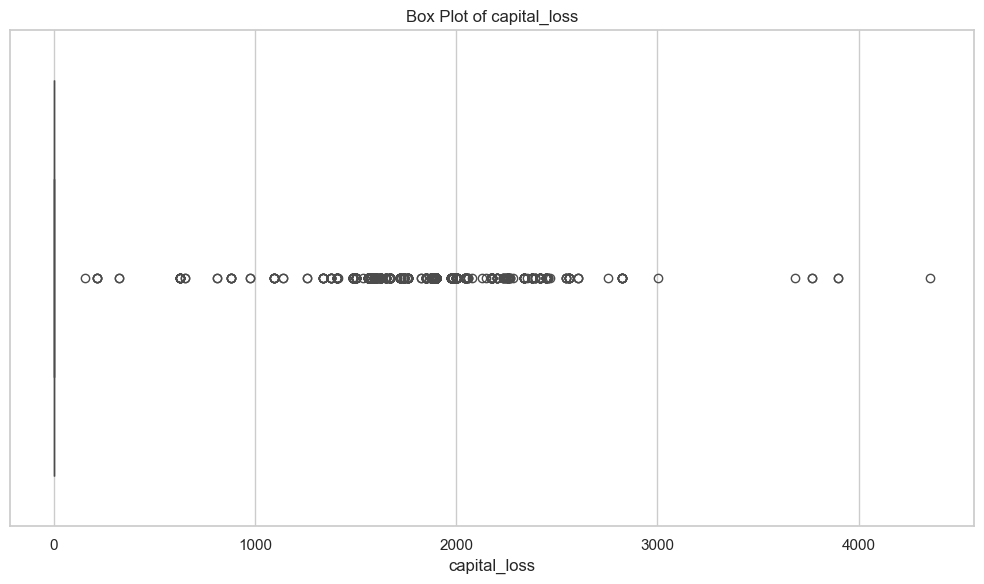

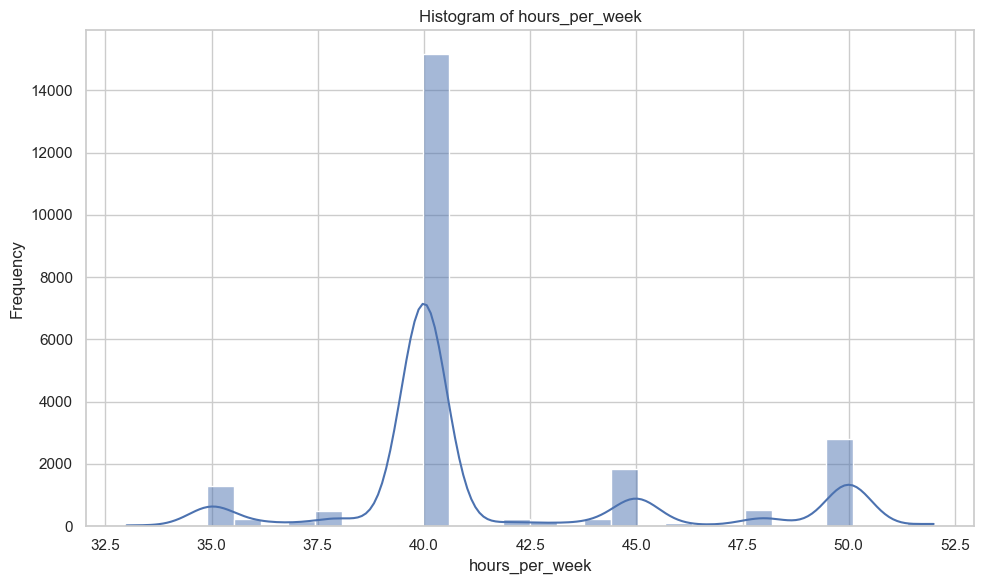

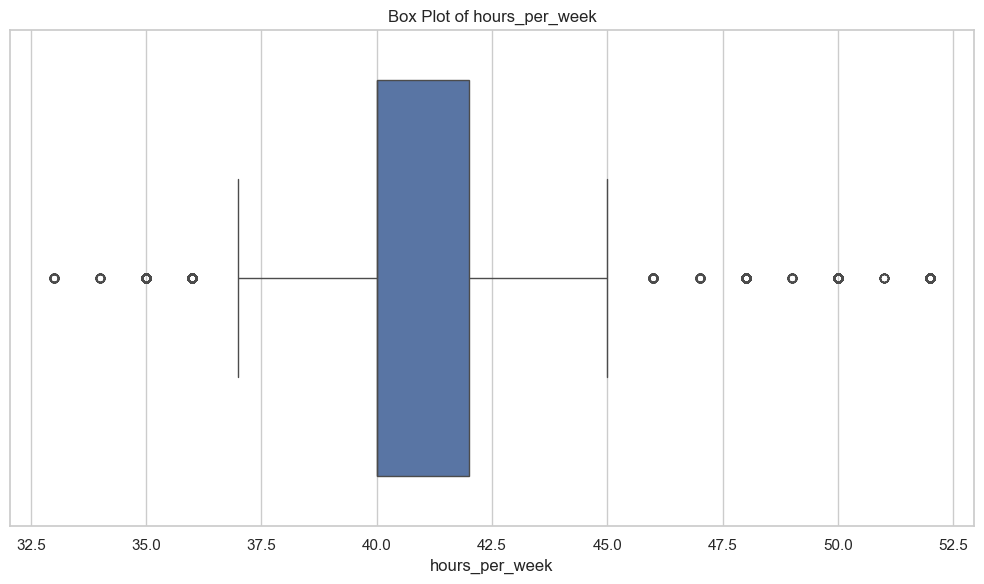

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("\n===== FREQUENCY DISTRIBUTIONS FOR CATEGORICAL VARIABLES =====")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())

# Plot frequency distributions (limiting to the top 10 categories for readability)
top_n = 10
for col in cat_cols:
    plt.figure()
    order = df[col].value_counts().nlargest(top_n).index
    sns.countplot(y=col, data=df, order=order)
    plt.title(f"Frequency Distribution of {col} (Top {top_n})")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Histograms and Box Plots for Numerical Variables
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Bivariate Analysis


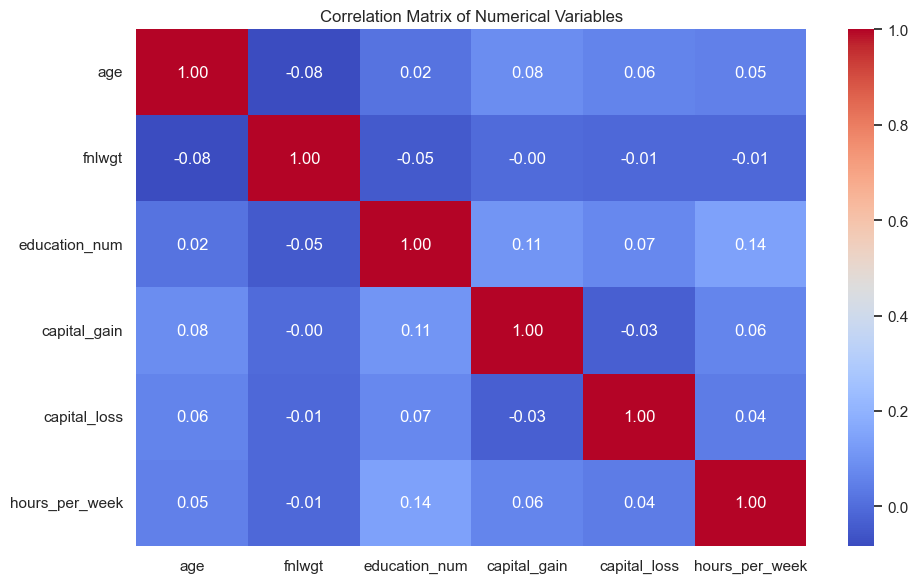

In [76]:
# Correlation Matrix for Numerical Variables
corr_matrix = df[numeric_cols].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()


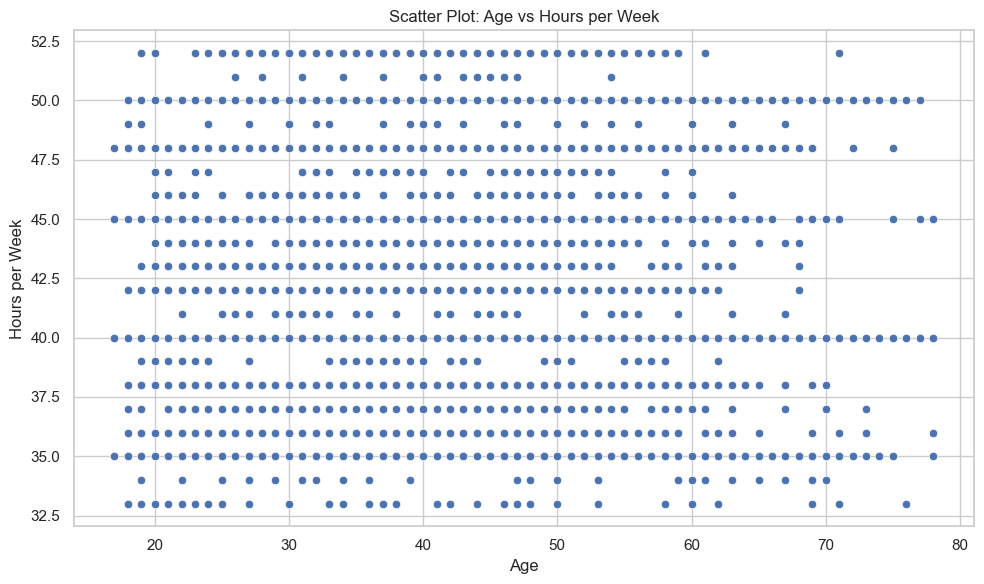

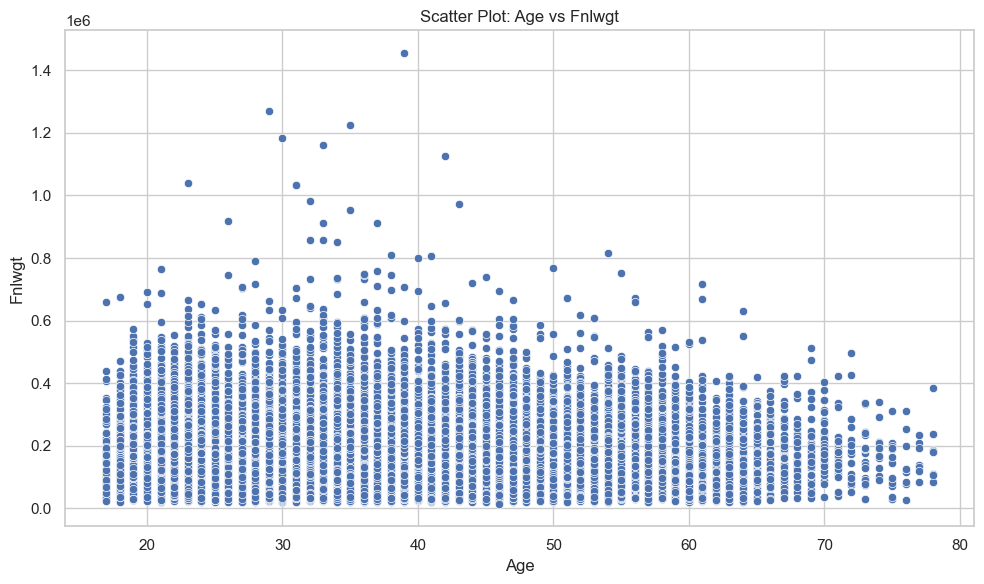

In [77]:
# Scatter Plots for Continuous Variable Relationships
# Example: age vs. hours_per_week and age vs. fnlwgt
plt.figure()
sns.scatterplot(x='age', y='hours_per_week', data=df)
plt.title("Scatter Plot: Age vs Hours per Week")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(x='age', y='fnlwgt', data=df)
plt.title("Scatter Plot: Age vs Fnlwgt")
plt.xlabel("Age")
plt.ylabel("Fnlwgt")
plt.tight_layout()
plt.show()

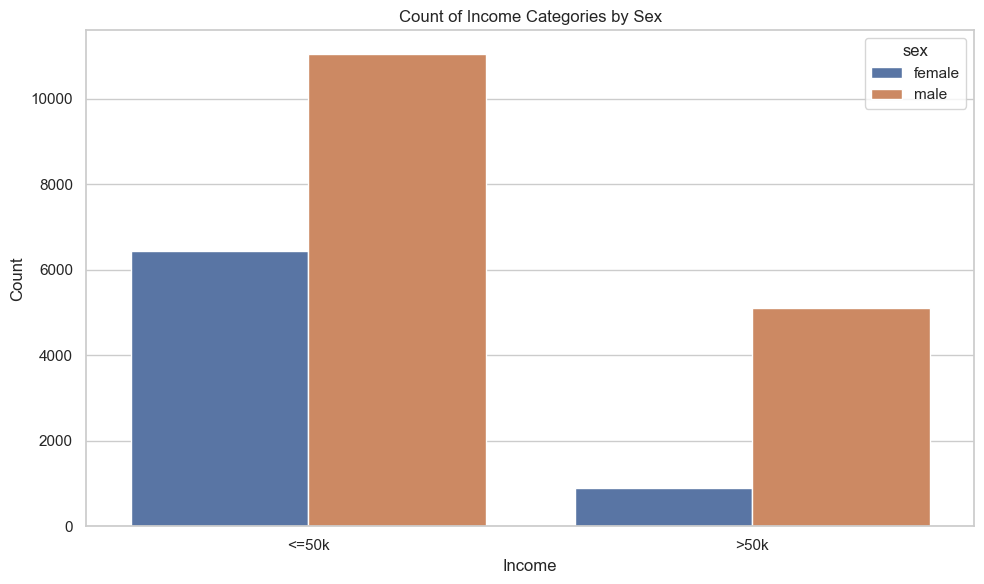

In [78]:
# Compare Categorical and Numerical Variables
# Bar Plot: Count of income categories by sex
plt.figure()
sns.countplot(x='income', hue='sex', data=df)
plt.title("Count of Income Categories by Sex")
plt.xlabel("Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

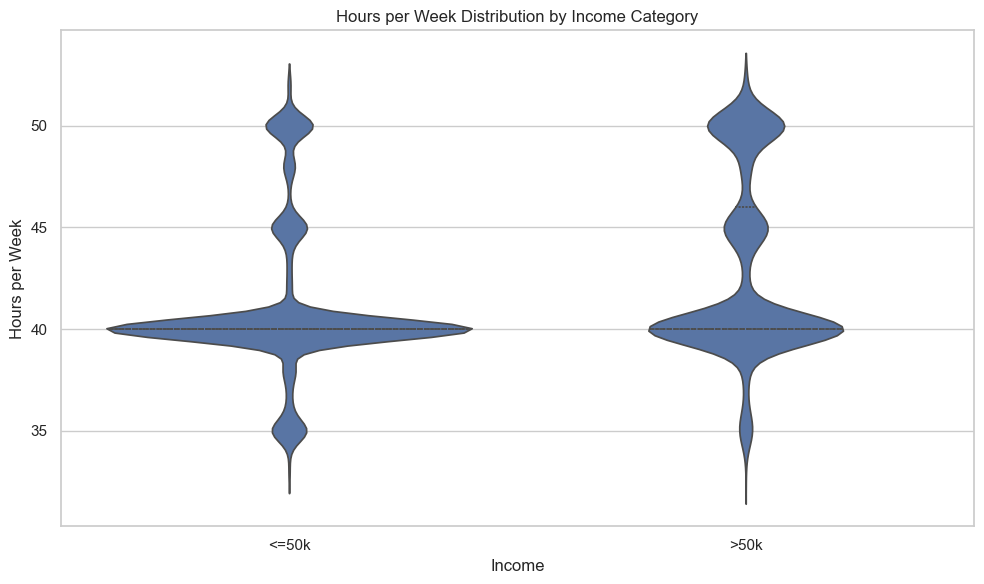

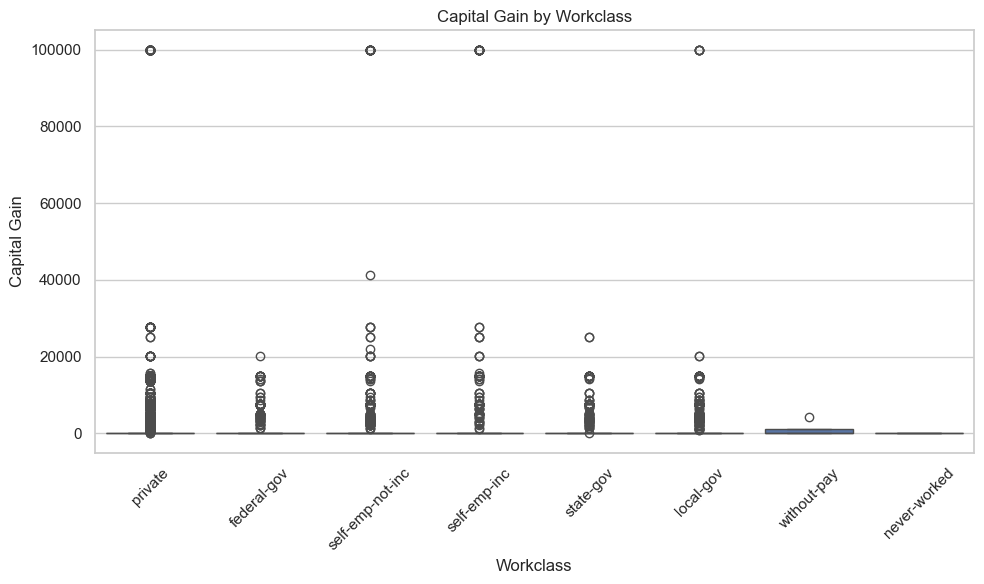

In [79]:
# Violin Plot: Distribution of hours_per_week by income category
plt.figure()
sns.violinplot(x='income', y='hours_per_week', data=df, inner='quartile')
plt.title("Hours per Week Distribution by Income Category")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.show()

# Box Plot: Capital Gain by workclass
plt.figure()
sns.boxplot(x='workclass', y='capital_gain', data=df)
plt.title("Capital Gain by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Capital Gain")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Multivariate Analysis

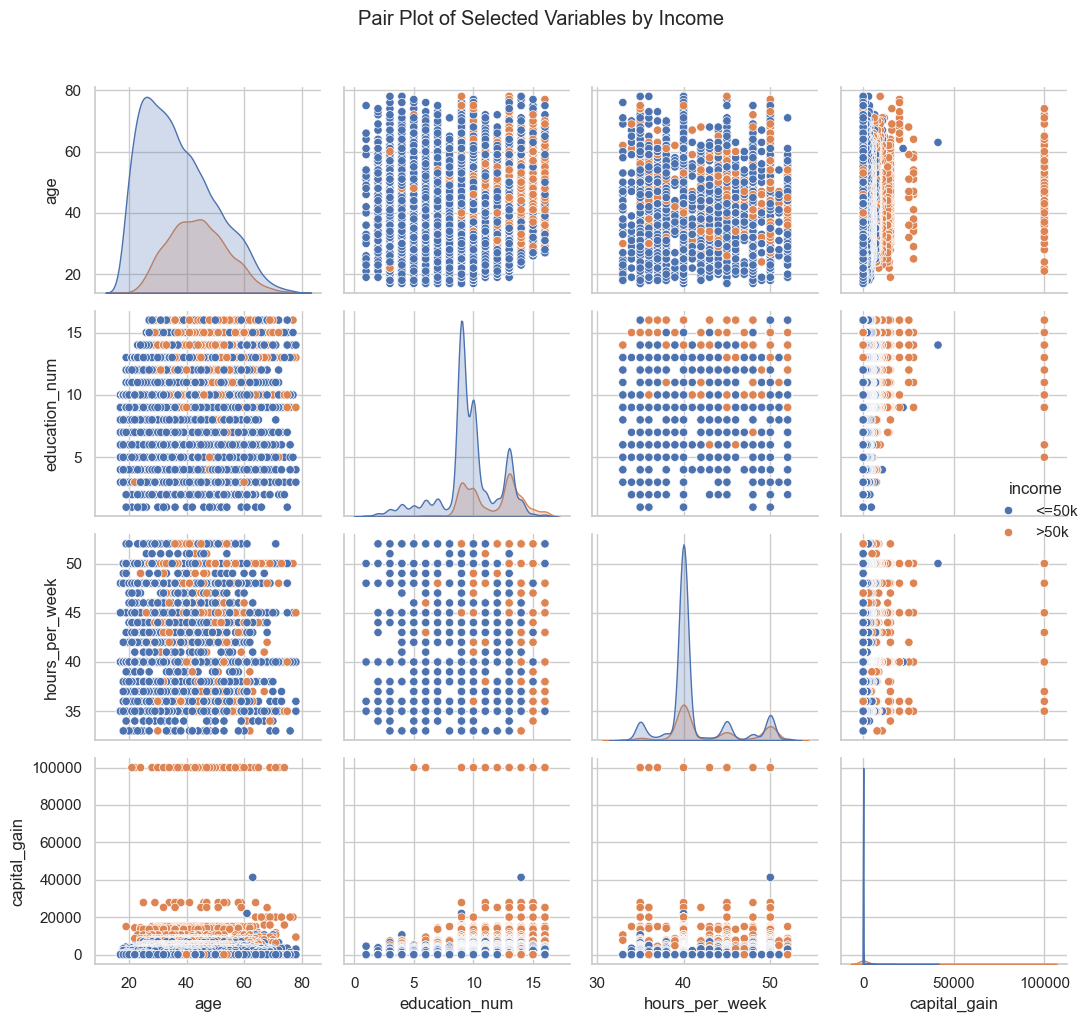

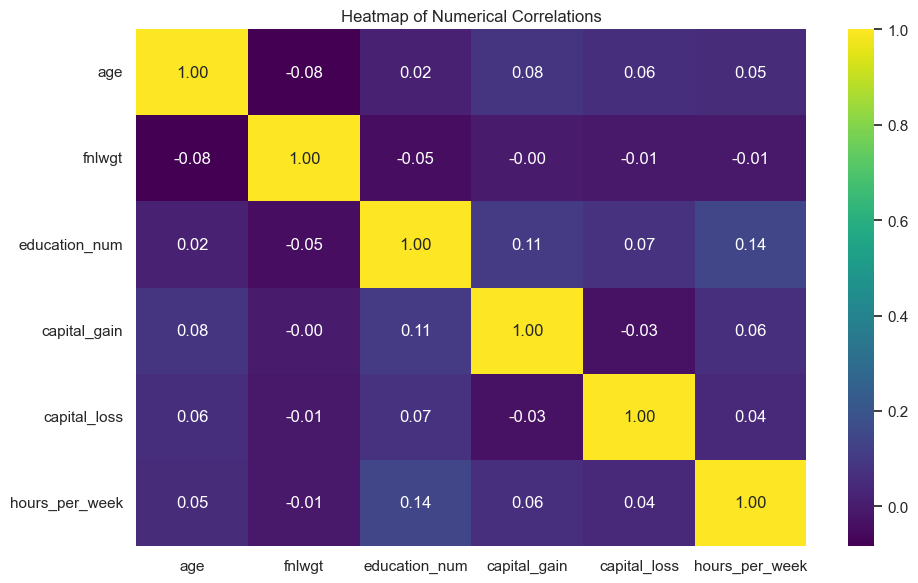


===== GROUPED COMPARISONS (Average Education_num and Hours per Week by Income and Sex) =====
  income     sex  education_num  hours_per_week
0  <=50k  female       9.954856       40.343469
1  <=50k    male       9.432594       41.553916
2   >50k  female      11.667042       41.694038
3   >50k    male      11.494120       43.121717


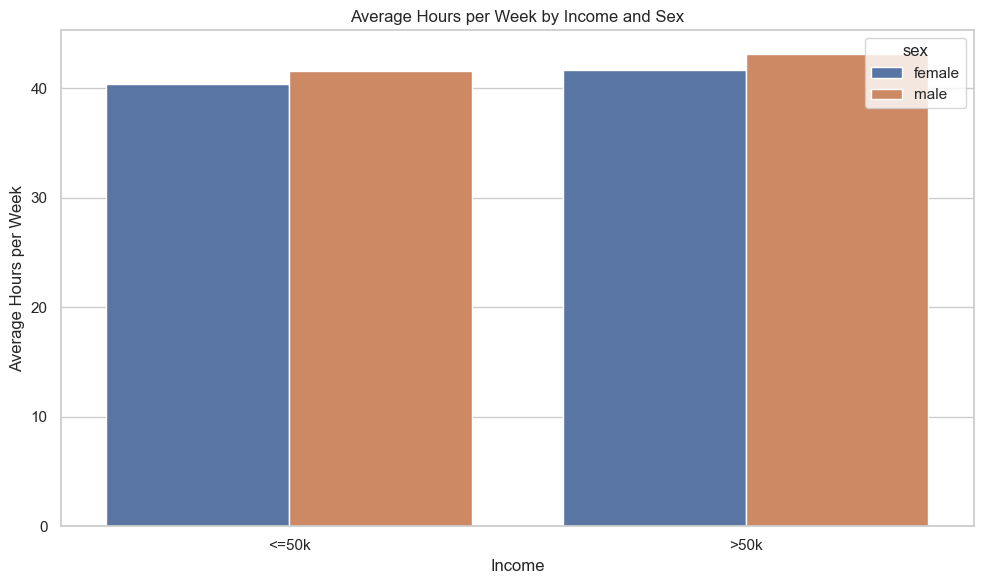

In [80]:
# Pair Plots for Multiple Variables
subset_cols = ['age', 'education_num', 'hours_per_week', 'capital_gain']
sns.pairplot(df[subset_cols + ['income']], hue='income')
plt.suptitle("Pair Plot of Selected Variables by Income", y=1.02)
plt.tight_layout()
plt.show()

# Heatmap (Reiterating correlation for emphasis)
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap of Numerical Correlations")
plt.tight_layout()
plt.show()

# Grouped Comparisons: Example - Average education_num and hours_per_week by income and sex
grouped_data = df.groupby(['income', 'sex'])[['education_num', 'hours_per_week']].mean().reset_index()
print("\n===== GROUPED COMPARISONS (Average Education_num and Hours per Week by Income and Sex) =====")
print(grouped_data)

plt.figure()
sns.barplot(x='income', y='hours_per_week', hue='sex', data=grouped_data)
plt.title("Average Hours per Week by Income and Sex")
plt.xlabel("Income")
plt.ylabel("Average Hours per Week")
plt.tight_layout()
plt.show()


#  SUMMARY / REPORT

REPORT SUMMARY:
---------------
1. DATA CLEANING:
   - Loaded the Adult Census Income dataset from the UCI repository.
   - Converted key columns (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) to numeric types.
   - Inspected data structure using head(), info(), and describe().
   - Handled missing values by imputing numeric columns with the median and categorical columns (workclass, occupation, native_country) with their modes.
   - Removed duplicate records.
   - Removed outliers from 'age' and 'hours_per_week' using the IQR method.
   - Standardized categorical values by converting to lowercase and trimming whitespace.
   
2. UNIVARIATE ANALYSIS:
   - Generated summary statistics for numeric variables (mean, median, variance, skewness).
   - Computed explicit medians and modes.
   - Displayed frequency distributions for categorical variables (limiting to the top 10 categories for clarity).
   - Produced histograms and box plots for each numeric variable.
   
3. BIVARIATE ANALYSIS:
   - Created a correlation matrix (visualized with a heatmap) to study relationships between numeric variables.
   - Produced scatter plots (e.g., age vs. hours_per_week and age vs. fnlwgt) to analyze continuous variable relationships.
   - Compared categorical and numerical variables using count plots, violin plots, and box plots.
   
4. MULTIVARIATE ANALYSIS:
   - Constructed pair plots to explore relationships among selected numeric variables with income as a grouping variable.
   - Revisited the correlation heatmap for a comprehensive visualization.
   - Performed grouped comparisons to analyze the combined effects of income and sex on education_num and hours_per_week.